In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):

    def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features =3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [3]:
#Pick a manual seed for randomisation
torch.manual_seed(41)

#create an instance of model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

In [6]:
my_df = pd.read_csv(url)

In [7]:
my_df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
107,7.3,2.9,6.3,1.8,virginica
87,6.3,2.3,4.4,1.3,versicolor
96,5.7,2.9,4.2,1.3,versicolor
39,5.1,3.4,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
75,6.6,3.0,4.4,1.4,versicolor


In [8]:
df = my_df

In [9]:
#change output col from string to integer
df["species"] = df['species'].replace("setosa", 0)
df["species"] = df['species'].replace("versicolor", 1)
df["species"] = df['species'].replace("virginica", 2)

/tmp/ipykernel_55/3442879674.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"] = df['species'].replace("virginica", 2)


In [10]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
74,6.4,2.9,4.3,1.3,1
79,5.7,2.6,3.5,1.0,1
112,6.8,3.0,5.5,2.1,2
41,4.5,2.3,1.3,0.3,0
116,6.5,3.0,5.5,1.8,2
110,6.5,3.2,5.1,2.0,2
38,4.4,3.0,1.3,0.2,0
62,6.0,2.2,4.0,1.0,1
40,5.0,3.5,1.3,0.3,0
65,6.7,3.1,4.4,1.4,1


In [11]:
# train test split set X, y

X = df.drop("species", axis = 1)
y = df["species"]

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [14]:
#convert these to numpy arrays
X = X.values
y = y.values

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

In [19]:
#convert these features from np arrays to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [20]:
#Convert y labels to LongTensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## Set the criterion of model to measure the error how far off the predicitons are from the data

In [21]:
criterion = nn.CrossEntropyLoss()

# 1 epoch is when we send all the data thru all the layers once.
# one run through all the training data in our network

In [22]:
#Choose Adam optimizer, lr = 0.01 (if error doesnt go down after a bunch of
# iterations, lower our lr)
#model.parameters = {fc1, fc2, out}

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [23]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

# Train our model!

In [24]:
epochs = 200
losses = []

for i in range(epochs):
    #go forward and get a prediction
    y_pred = model.forward(X_train) #get predicited resultsc

    #measure the loss/ error, gonna be high at first
    loss = criterion(y_pred, y_train) #predicted values vs the y_train

    #keep track of our losses
    losses.append(loss.detach().numpy())

    #print every 10 epochs
    if i%10 == 0:
        print(f"Epoch: {i} and loss: {loss}")

    #Back propogation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1251550912857056
Epoch: 10 and loss: 1.0096259117126465
Epoch: 20 and loss: 0.8157405853271484
Epoch: 30 and loss: 0.585706353187561
Epoch: 40 and loss: 0.3999636471271515
Epoch: 50 and loss: 0.2676880657672882
Epoch: 60 and loss: 0.17942363023757935
Epoch: 70 and loss: 0.12151690572500229
Epoch: 80 and loss: 0.0860118418931961
Epoch: 90 and loss: 0.06520850956439972
Epoch: 100 and loss: 0.05286576971411705
Epoch: 110 and loss: 0.04508377984166145
Epoch: 120 and loss: 0.03979950025677681
Epoch: 130 and loss: 0.035970721393823624
Epoch: 140 and loss: 0.03293721750378609
Epoch: 150 and loss: 0.030419377610087395
Epoch: 160 and loss: 0.026795225217938423
Epoch: 170 and loss: 0.023382490500807762
Epoch: 180 and loss: 0.02053171582520008
Epoch: 190 and loss: 0.018496563658118248


## Graph it out!

Text(0.5, 0, 'epochs')

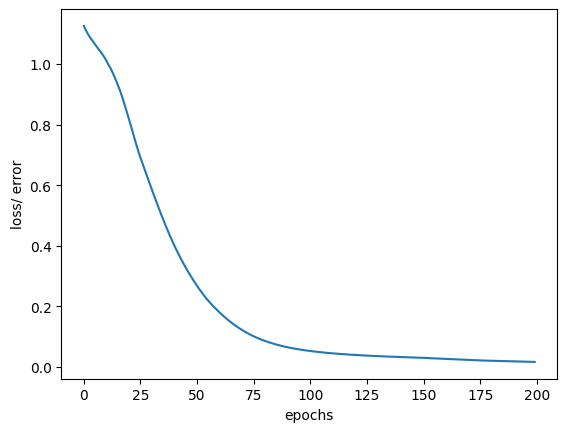

In [25]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/ error")
plt.xlabel("epochs")

# 7

## Model evaluation on test dataset #Validate model on test set

In [26]:
with torch.no_grad(): #Basically turn off back propogation
    y_eval = model.forward(X_test) #y_eval is predicted, forward is function defined earlier
    loss = criterion(y_eval, y_test) #Find the loss or error

In [27]:
loss

tensor(0.1816)

## checking o see how our model did on train and test data

## setosa    0
## vesicolor 1
## virginica 2

In [41]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        yt = y_test[i]

        if yt == 0:
            cls = "Setosa"
        elif yt == 1:
            cls = "Vesicolor"
        else:
            cls = "Virginica"

        #this will tell us what type of flower class our network thinks it is
        print(f'{i+1}.) {str(y_val)} \t {cls}')

        #check if its correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1
            print("Correct")
        else:
            print("Wrong!")

print(f"We got {correct} correct")

1.) tensor([-7.1094,  3.8939,  9.0023]) 	 Virginica
Correct
2.) tensor([-9.7571,  1.8032, 15.7623]) 	 Virginica
Correct
3.) tensor([-10.9679,   2.8771,  16.6049]) 	 Virginica
Correct
4.) tensor([-3.7651,  8.0382, -1.2670]) 	 Vesicolor
Correct
5.) tensor([-9.0336,  3.5231, 12.6397]) 	 Virginica
Correct
6.) tensor([-1.8252,  8.6930, -5.3406]) 	 Vesicolor
Correct
7.) tensor([-6.8739,  4.9814,  7.3719]) 	 Virginica
Correct
8.) tensor([-3.6496,  8.2250, -1.6720]) 	 Vesicolor
Correct
9.) tensor([-7.9286,  4.2582,  9.9591]) 	 Virginica
Correct
10.) tensor([-10.4300,   1.8736,  16.8136]) 	 Virginica
Correct
11.) tensor([-6.4731,  5.1587,  6.5103]) 	 Virginica
Correct
12.) tensor([ 12.4402,   2.4554, -21.9006]) 	 Setosa
Correct
13.) tensor([ 11.4201,   2.2030, -19.9097]) 	 Setosa
Correct
14.) tensor([-0.1948,  6.9621, -6.0906]) 	 Vesicolor
Correct
15.) tensor([ 10.1552,   3.3046, -19.1049]) 	 Setosa
Correct
16.) tensor([-5.9773,  5.7982,  4.9693]) 	 Virginica
Wrong!
17.) tensor([ 11.2076,   2.5

# 8

## Adding new data and then evaluating the performance of our model on that

In [35]:
new_iris = torch.tensor([4.7, 3.2, 5.3, 0.2])

In [36]:
#we're going to do the same thing what we did w our test data
#bc this new data point is just a test data only!

In [37]:
with torch.no_grad():
    print(model(new_iris))

tensor([-1.5642,  6.6536, -3.4051])


In [38]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [39]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-7.2824,  3.8635,  9.3364])


# 9: Save and load our Pytorch model



In [40]:
print(newer_iris)

tensor([5.9000, 3.0000, 5.1000, 1.8000])


In [42]:
#save our NN model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.py')

In [45]:
#Load the saved model
new_model = Model()
#loadind th wts and biases
new_model.load_state_dict(torch.load("my_really_awesome_iris_model.py"))

<All keys matched successfully>

In [46]:
#make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

# from here on out, use new_model instead of model